In [1]:
# https://github.com/DSPavan/PyClassNotes/blob/master/LGD_DATA.csv
# RAW LINK -  NOTE
data <- read.csv("https://raw.githubusercontent.com/DSPavan/PyClassNotes/master/LGD_DATA.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

print(str(data))



'data.frame':	15290 obs. of  7 variables:
 $ Ac_No              : int  150024 144880 133742 151282 174407 142548 183396 106838 137434 192628 ...
 $ Age                : int  24 31 56 52 20 29 36 67 69 16 ...
 $ Years.of.Experience: int  5 10 37 31 3 8 19 49 48 0 ...
 $ Number.of.Vehicles : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Gender             : chr  "M" "F" "M" "F" ...
 $ Married            : chr  "Married" "Single" "Married" "Married" ...
 $ Losses.in.Thousands: num  203 402 553 292 247 ...
NULL


In [2]:
print(head(data))

   Ac_No Age Years.of.Experience Number.of.Vehicles Gender Married
1 150024  24                   5                  1      M Married
2 144880  31                  10                  1      F  Single
3 133742  56                  37                  1      M Married
4 151282  52                  31                  1      F Married
5 174407  20                   3                  1      M  Single
6 142548  29                   8                  1      M Married
  Losses.in.Thousands
1            203.3196
2            402.1973
3            553.1321
4            292.4306
5            246.5406
6            384.6764


In [3]:
install.packages("dummies")


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [4]:
# Creating Dummy variable - Explain to students
library(dummies)

dummies-1.5.6 provided by Decision Patterns



In [5]:
datanew <- dummy.data.frame(data, sep = ".")

names(datanew)



[1] "Ac_No"               "Age"                 "Years.of.Experience"
[4] "Number.of.Vehicles"  "Gender.F"            "Gender.M"           
[7] "Married.Married"     "Married.Single"      "Losses.in.Thousands"

In [6]:
head(datanew)

Ac_No,Age,Years.of.Experience,Number.of.Vehicles,Gender.F,Gender.M,Married.Married,Married.Single,Losses.in.Thousands
150024,24,5,1,0,1,1,0,203.3196
144880,31,10,1,1,0,0,1,402.1973
133742,56,37,1,0,1,1,0,553.1321
151282,52,31,1,1,0,1,0,292.4306
174407,20,3,1,0,1,0,1,246.5406
142548,29,8,1,0,1,1,0,384.6764


In [7]:
options(digits=5)
df1 <- data.frame(datanew$Years.of.Experience,
         datanew$Number.of.Vehicles, 
         datanew$Gender.F,
         datanew$Married.Married, 
         datanew$Losses.in.Thousands)
head(df1)

datanew.Years.of.Experience,datanew.Number.of.Vehicles,datanew.Gender.F,datanew.Married.Married,datanew.Losses.in.Thousands
5,1,0,1,203.32
10,1,1,0,402.20
37,1,0,1,553.13
31,1,1,1,292.43
3,1,0,0,246.54
8,1,0,1,384.68


In [8]:
#install.packages("dplyr")

In [9]:
library("dplyr")
finaldf <- select(df1, 
      Exp =  datanew.Years.of.Experience,
    Nveh = datanew.Number.of.Vehicles ,
       F = datanew.Gender.F ,
       M = datanew.Married.Married ,
       LGD = datanew.Losses.in.Thousands
      )

head(finaldf)
# Rename, seelct


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Exp,Nveh,F,M,LGD
5,1,0,1,203.32
10,1,1,0,402.20
37,1,0,1,553.13
31,1,1,1,292.43
3,1,0,0,246.54
8,1,0,1,384.68


In [10]:
# rename(my_data, sepal_length = Sepal.Length,       sepal_width = Sepal.Width)


cor(finaldf$LGD ,finaldf$Exp)
cor(finaldf$LGD , finaldf$Nveh)
cor(finaldf$LGD , finaldf$F)
cor(finaldf$LGD , finaldf$M)


[1] -0.44211

[1] -0.011553

[1] -0.18434

[1] -0.26533

In [11]:
summary(finaldf)

      Exp            Nveh           F               M              LGD        
 Min.   : 0.0   Min.   :1.0   Min.   :0.000   Min.   :0.000   Min.   :  12.5  
 1st Qu.: 6.0   1st Qu.:2.0   1st Qu.:0.000   1st Qu.:0.000   1st Qu.: 226.4  
 Median :23.0   Median :2.0   Median :1.000   Median :1.000   Median : 354.9  
 Mean   :23.7   Mean   :2.5   Mean   :0.507   Mean   :0.509   Mean   : 389.9  
 3rd Qu.:42.0   3rd Qu.:3.0   3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.: 488.7  
 Max.   :53.0   Max.   :4.0   Max.   :1.000   Max.   :1.000   Max.   :3500.0  

In [12]:
#cor(LGD ~ Age)
str(finaldf)

'data.frame':	15290 obs. of  5 variables:
 $ Exp : int  5 10 37 31 3 8 19 49 48 0 ...
 $ Nveh: int  1 1 1 1 1 1 1 1 1 1 ...
 $ F   : int  0 1 0 1 0 0 1 1 0 1 ...
 $ M   : int  1 0 1 1 0 1 0 1 0 0 ...
 $ LGD : num  203 402 553 292 247 ...


In [14]:
#cor(finaldf$LGD , finaldf$Exp)
#cor(finaldf$LGD , finaldf$Nveh)
#cor(finaldf$LGD , finaldf$F)
#cor(finaldf$LGD , finaldf$M)



ERROR: Error in cor(finaldf$LGD, finaldf$Age): supply both 'x' and 'y' or a matrix-like 'x'


In [15]:
cor(finaldf )

,Exp,Nveh,F,M,LGD
Exp,1.0000000,0.0085445,-0.0073854,-0.0050288,-0.442115
Nveh,0.0085445,1.0000000,0.0011549,-0.0095239,-0.011553
F,-0.0073854,0.0011549,1.0000000,0.0080019,-0.184339
M,-0.0050288,-0.0095239,0.0080019,1.0000000,-0.265330
LGD,-0.4421147,-0.0115531,-0.1843390,-0.2653303,1.000000


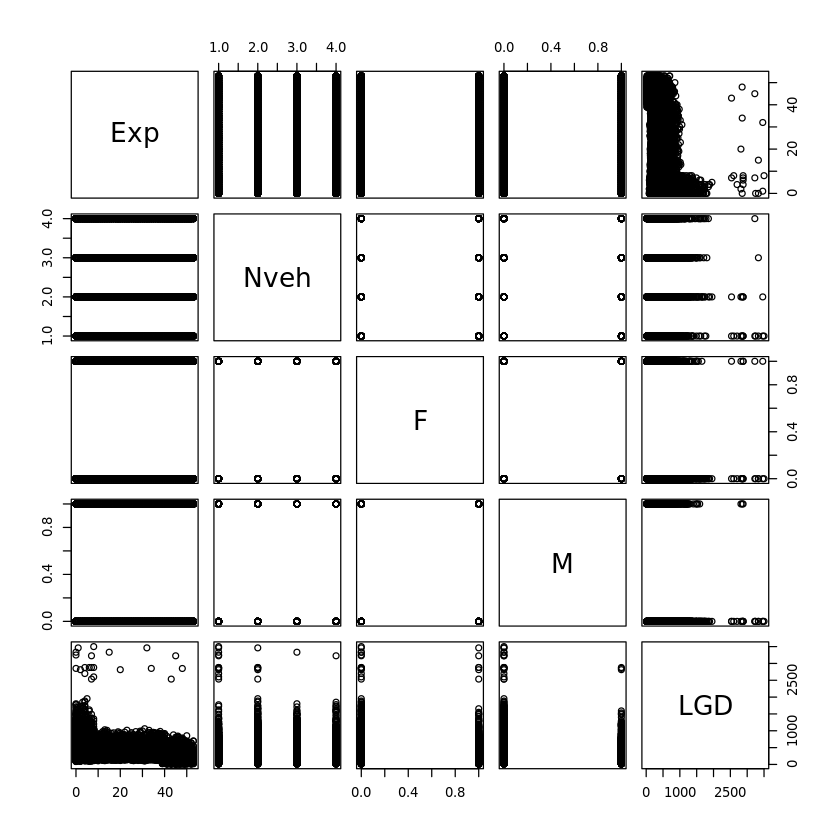

In [16]:
pairs(finaldf)

In [17]:
linearMod <- lm(finaldf$LGD ~ . , data=finaldf)  # all 
summary(linearMod)


Call:
lm(formula = finaldf$LGD ~ ., data = finaldf)

Residuals:
   Min     1Q Median     3Q    Max 
-470.4 -132.7  -21.6   93.2 3098.4 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  663.0337     5.8622  113.10   <2e-16 ***
Exp           -6.3215     0.0961  -65.79   <2e-16 ***
Nveh          -2.6799     1.7984   -1.49     0.14    
F            -94.1298     3.4307  -27.44   <2e-16 ***
M           -135.0923     3.4311  -39.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 212 on 15285 degrees of freedom
Multiple R-squared:  0.302,	Adjusted R-squared:  0.301 
F-statistic: 1.65e+03 on 4 and 15285 DF,  p-value: <2e-16


In [18]:
linearMod <- lm(finaldf$LGD ~ finaldf$Exp + finaldf$Nveh , data=finaldf)  # all 
summary(linearMod)


Call:
lm(formula = finaldf$LGD ~ finaldf$Exp + finaldf$Nveh, data = finaldf)

Residuals:
   Min     1Q Median     3Q    Max 
-452.1 -146.5  -31.0   97.9 3121.3 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   544.143      5.690   95.63   <2e-16 ***
finaldf$Exp    -6.283      0.103  -60.93   <2e-16 ***
finaldf$Nveh   -2.069      1.930   -1.07     0.28    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 228 on 15287 degrees of freedom
Multiple R-squared:  0.196,	Adjusted R-squared:  0.195 
F-statistic: 1.86e+03 on 2 and 15287 DF,  p-value: <2e-16


In [19]:
# Very BAD Correlation, so bad regression too

# Create Training and Test data -
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(finaldf), 0.8*nrow(finaldf))  # row indices for training data
trainingData <- finaldf[trainingRowIndex, ]  # model training data
testData  <- finaldf[-trainingRowIndex, ]   # test data

In [20]:
# Build the model on training data -
linearModtr <- lm(LGD ~ ., data=trainingData) 
summary(linearModtr)



Call:
lm(formula = LGD ~ ., data = trainingData)

Residuals:
   Min     1Q Median     3Q    Max 
-450.9 -131.7  -21.7   92.8 3097.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  666.697      6.587  101.22   <2e-16 ***
Exp           -6.327      0.108  -58.82   <2e-16 ***
Nveh          -3.279      2.017   -1.63      0.1    
F            -96.530      3.840  -25.14   <2e-16 ***
M           -135.769      3.840  -35.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 212 on 12227 degrees of freedom
Multiple R-squared:  0.304,	Adjusted R-squared:  0.304 
F-statistic: 1.34e+03 on 4 and 12227 DF,  p-value: <2e-16


In [21]:
distPred <- predict(linearModtr, testData)  # predict distance

result1 <- data.frame(LGD = testData$LGD , PredLGD= distPred , diff = (testData$LGD-distPred) )
head(result1)

,LGD,PredLGD,diff
1,203.32,496.01,-292.692
10,242.77,566.89,-324.115
11,763.73,657.09,106.640
24,273.16,256.85,16.310
26,169.38,562.18,-392.803
29,210.31,291.92,-81.604


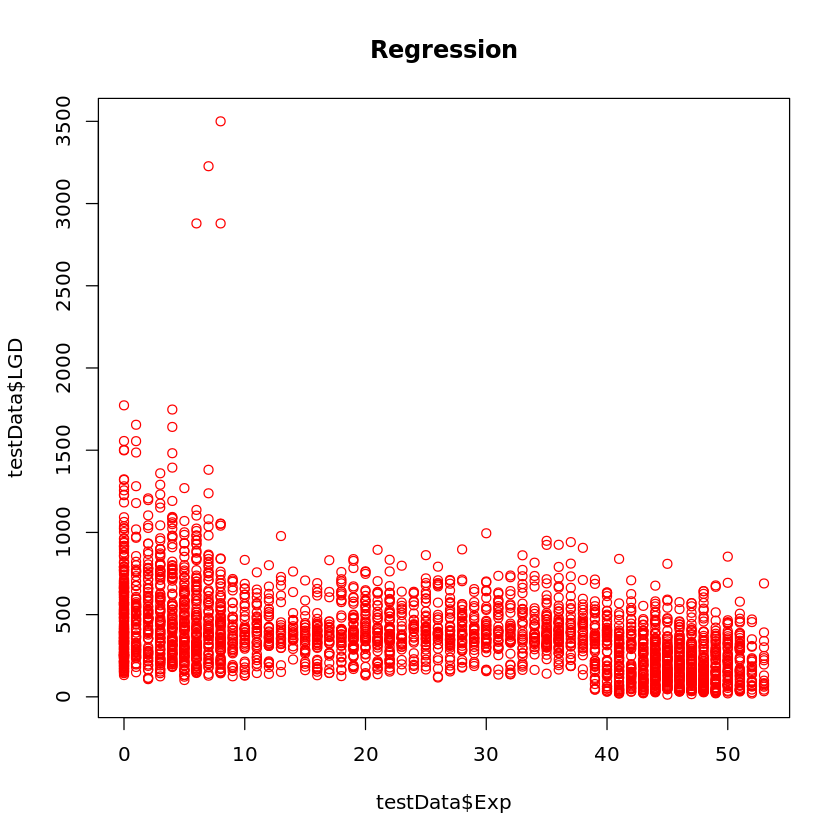

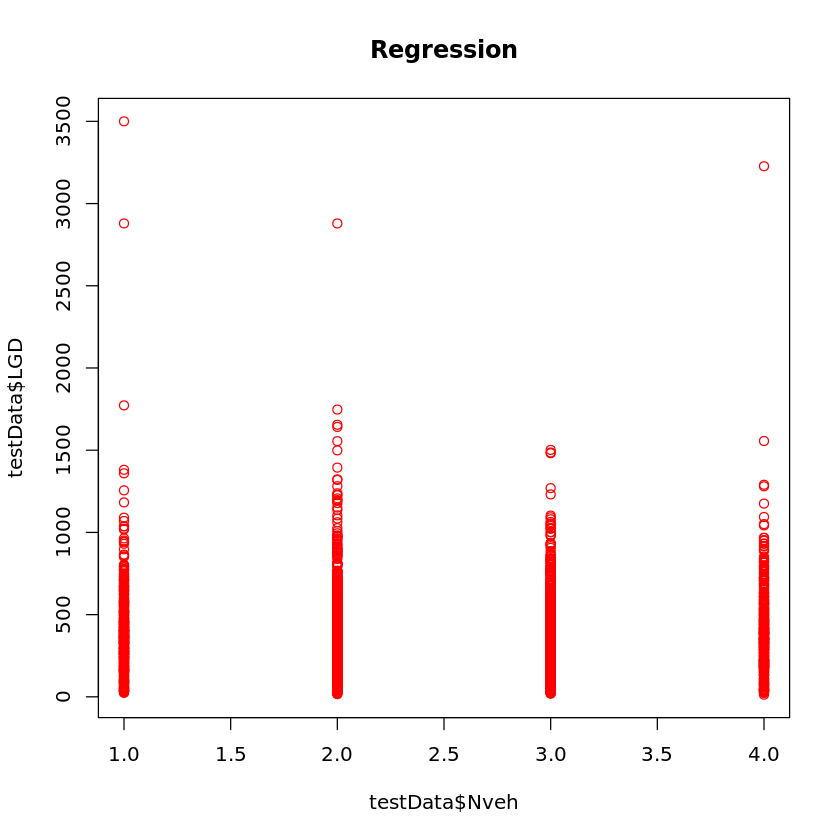

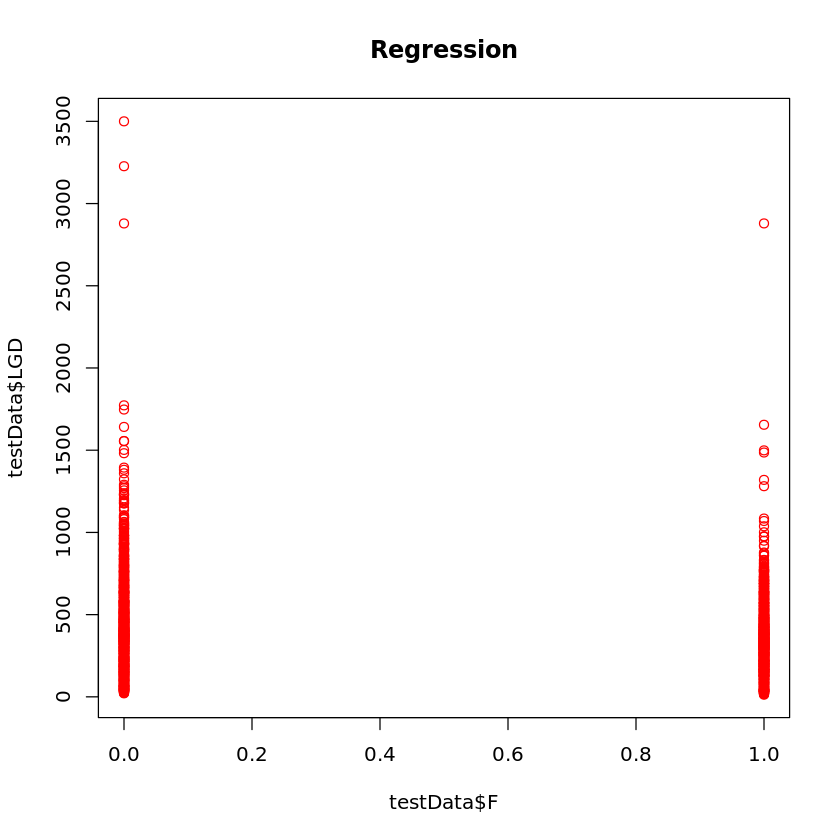

Warning message in abline(lm(testData$LGD ~ testData$Exp + testData$Nveh + testData$F + :
“only using the first two of 5 regression coefficients”

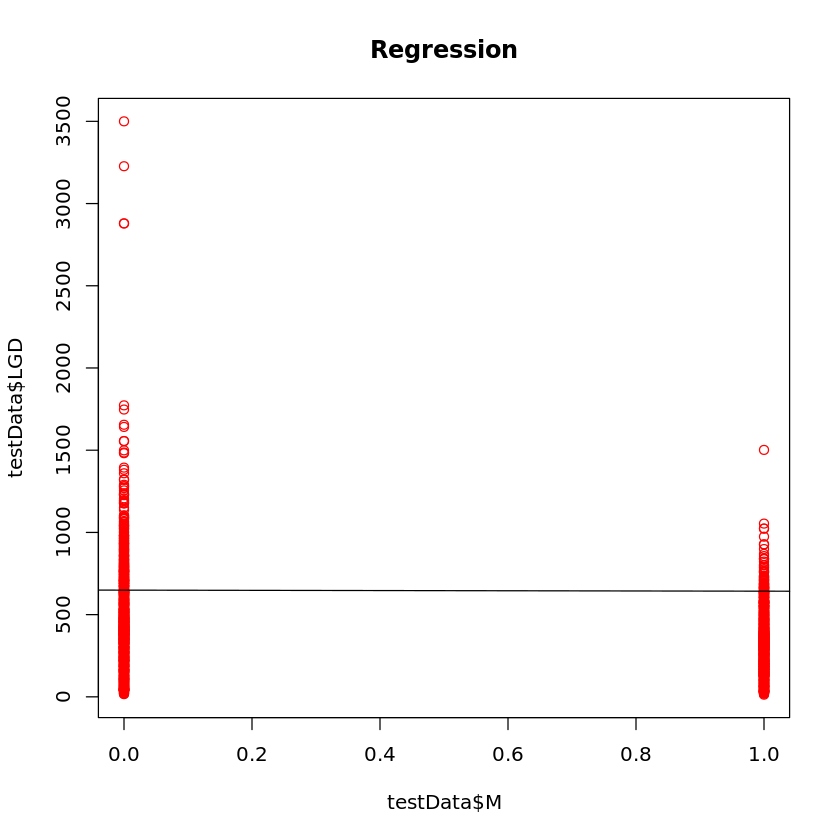

In [22]:
plot(testData$LGD ~ testData$Exp+testData$Nveh+testData$F+testData$M ,col = "red",main = "Regression", data=testData)
abline(lm(testData$LGD ~ testData$Exp+testData$Nveh+testData$F+testData$M ,  data=testData))

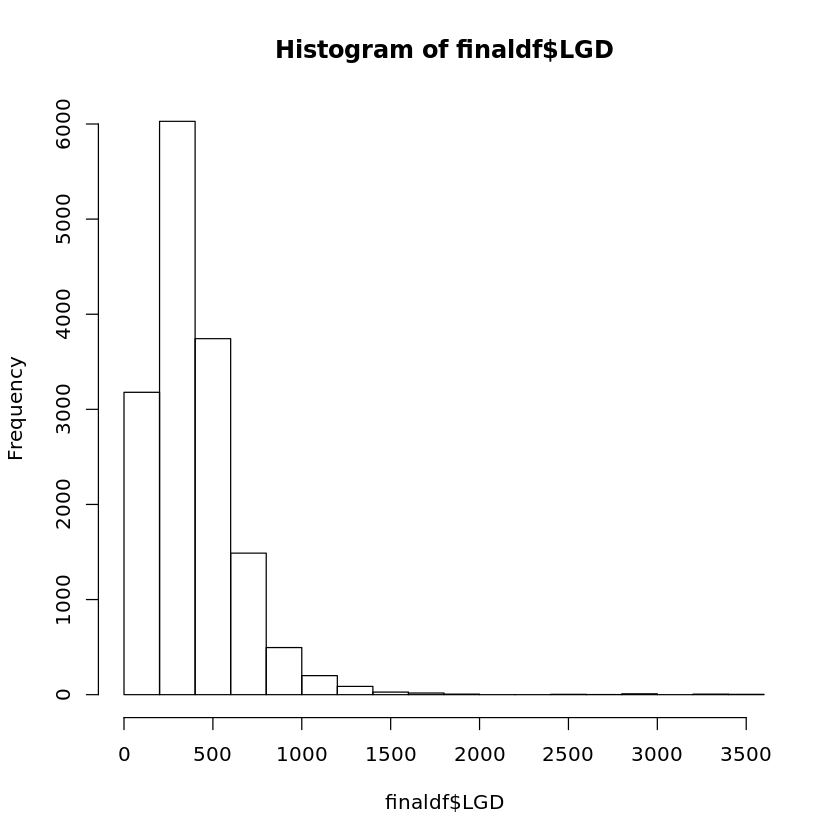

In [23]:
# Filter LGD , below 700 , beacuse of outliers
hist(finaldf$LGD)


In [24]:
df <- subset(finaldf, finaldf$LGD < 300)
summary(df)

      Exp            Nveh            F              M              LGD       
 Min.   : 0.0   Min.   :1.00   Min.   :0.00   Min.   :0.000   Min.   : 12.5  
 1st Qu.:15.0   1st Qu.:2.00   1st Qu.:0.00   1st Qu.:0.000   1st Qu.:114.4  
 Median :42.0   Median :2.00   Median :1.00   Median :1.000   Median :185.3  
 Mean   :32.8   Mean   :2.49   Mean   :0.58   Mean   :0.624   Mean   :176.5  
 3rd Qu.:47.0   3rd Qu.:3.00   3rd Qu.:1.00   3rd Qu.:1.000   3rd Qu.:244.7  
 Max.   :53.0   Max.   :4.00   Max.   :1.00   Max.   :1.000   Max.   :300.0  

In [25]:
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(df), 0.8*nrow(df))  # row indices for training data
trainingData <- df[trainingRowIndex, ]  # model training data
testData  <- df[-trainingRowIndex, ]   # test data

In [28]:
# Build the model on training data -
linearModtr <- lm(LGD ~ ., data=trainingData) 
summary(linearModtr)

distPred <- predict(linearModtr, testData)  # predict distance
#print(distPred )




Call:
lm(formula = LGD ~ ., data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-150.17  -57.31   -0.21   56.07  162.88 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 250.5547     4.3033   58.22  < 2e-16 ***
Exp          -1.9860     0.0615  -32.29  < 2e-16 ***
Nveh         -0.9162     1.1218   -0.82  0.41415    
F            -4.0017     2.2055   -1.81  0.06968 .  
M            -7.7511     2.2705   -3.41  0.00065 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 72.4 on 4523 degrees of freedom
Multiple R-squared:  0.19,	Adjusted R-squared:  0.19 
F-statistic:  266 on 4 and 4523 DF,  p-value: <2e-16


In [30]:
head( data.frame(LGD = df$LGD ,  fitted = distPred) )

Warning message in data.frame(LGD = df$LGD, fitted = distPred):
“row names were found from a short variable and have been discarded”

LGD,fitted
203.320,144.57
292.431,140.57
246.541,241.89
168.934,154.31
69.893,233.91
242.773,148.51


In [31]:
# Next analysis
head(finaldf)
# LGD to Log value


Exp,Nveh,F,M,LGD
5,1,0,1,203.32
10,1,1,0,402.20
37,1,0,1,553.13
31,1,1,1,292.43
3,1,0,0,246.54
8,1,0,1,384.68


In [33]:
finaldf <- finaldf %>%
  mutate(log10LGD = log10(LGD) , logLGD = log(LGD) )

head(finaldf)


Exp,Nveh,F,M,LGD,log10LGD,logLGD
5,1,0,1,203.32,2.3082,5.3148
10,1,1,0,402.20,2.6044,5.9969
37,1,0,1,553.13,2.7428,6.3156
31,1,1,1,292.43,2.4660,5.6782
3,1,0,0,246.54,2.3919,5.5075
8,1,0,1,384.68,2.5851,5.9524


In [36]:
linearModtr <- lm(log10LGD ~ Exp+Nveh+F+M, data = finaldf) 
summary(linearModtr)
distPred <- predict(linearModtr, finaldf)  # predict distance


Call:
lm(formula = log10LGD ~ Exp + Nveh + F + M, data = finaldf)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1773 -0.1344  0.0361  0.1729  1.1829 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.830201   0.007226  391.67   <2e-16 ***
Exp         -0.009171   0.000118  -77.43   <2e-16 ***
Nveh        -0.000773   0.002217   -0.35     0.73    
F           -0.090859   0.004229  -21.49   <2e-16 ***
M           -0.135579   0.004229  -32.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.261 on 15285 degrees of freedom
Multiple R-squared:  0.328,	Adjusted R-squared:  0.327 
F-statistic: 1.86e+03 on 4 and 15285 DF,  p-value: <2e-16


In [37]:
head( data.frame(LGD = finaldf$LGD , log10LGD = finaldf$log10LGD ,   fitted = distPred) )

LGD,log10LGD,fitted
203.32,2.3082,2.6480
402.20,2.6044,2.6469
553.13,2.7428,2.3545
292.43,2.4660,2.3187
246.54,2.3919,2.8019
384.68,2.5851,2.6205


In [40]:
# Multi Colinearity
# one of the assumptions of Classical Linear Regression Model
# is that there is no exact collinearity between the explanatory variables
# install.packages("mctest")


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [45]:
library(mctest)
omcdiag(finaldf, finaldf$log10LGD)

# Farrar – Glauber Test

Warning message in summary.lm(lm(y ~ x)):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(x[, i] ~ x[, -i])):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(x[, i] ~ x[, -i])):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(y ~ x[, i])):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(x[, i] ~ x[, -i])):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(x[, i] ~ x[, -i])):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(y ~ x[, i])):
“essentially perfect fit: summary may be unreliable”Warning message in sqrt(max(Eigval)/min(Eigval)):
“NaNs produced”Warning message in sqrt(max(x$Eigval)/x$Eigval):
“NaNs produced”


Call:
omcdiag(x = finaldf, y = finaldf$log10LGD)


Overall Multicollinearity Diagnostics

                        MC Results detection
Determinant |X'X|:      0.0000e+00         1
Farrar Chi-Square:      5.6494e+05         1
Red Indicator:          4.0200e-01         0
Sum of Lambda Inverse:  4.5036e+15         1
Theil's Method:        -2.8410e+00         0
Condition Number:              NaN        NA

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

Eigvenvalues with INTERCEPT
                   Intercept   Exp  Nveh     F     M    LGD log10LGD logLGD
Eigenvalues:           6.311 0.580 0.487 0.422 0.136  0.060    0.003      0
Condition Indices:     1.000 3.297 3.601 3.868 6.801 10.224   45.384    NaN

In [46]:
imcdiag(finaldf, finaldf$log10LGD)

Warning message in summary.lm(lm(y ~ x)):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(x[, i] ~ x[, -i])):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(x[, i] ~ x[, -i])):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(y ~ x[, i])):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(x[, i] ~ x[, -i])):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(x[, i] ~ x[, -i])):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(y ~ x[, i])):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(y ~ x)):
“essentially perfect fit: summary may be unreliable”


Call:
imcdiag(x = finaldf, y = finaldf$log10LGD)


All Individual Multicollinearity Diagnostics Result

           VIF   TOL       Wi       Fi Leamer CVIF Klein
Exp      1.396 0.716 1009.799 1211.838  0.846    0     0
Nveh     1.000 1.000    1.088    1.306  1.000    0     0
F        1.049 0.953  125.779  150.945  0.976    0     0
M        1.102 0.908  259.325  311.211  0.953    0     0
LGD      3.771 0.265 7057.984 8470.135  0.515    0     0
log10LGD   Inf 0.000      Inf      Inf  0.000  NaN     0
logLGD     Inf 0.000      Inf      Inf  0.000  NaN     0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

Nveh , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 1 

* use method argument to check which regressors may be the reason of collinearity

In [48]:
# The VIF, TOL and Wi columns provide the diagnostic output for 
# variance inflation factor,
# tolerance and Farrar-Glauber F-test respectively. 

# highly collinear variables such as ‘age’ and ‘experience’.

imcdiag(finaldf, finaldf$log10LGD, method="VIF")

Warning message in summary.lm(lm(y ~ x)):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(x[, i] ~ x[, -i])):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(x[, i] ~ x[, -i])):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(y ~ x[, i])):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(x[, i] ~ x[, -i])):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(x[, i] ~ x[, -i])):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(y ~ x[, i])):
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(lm(y ~ x)):
“essentially perfect fit: summary may be unreliable”


Call:
imcdiag(x = finaldf, y = finaldf$log10LGD, method = "VIF")


 VIF Multicollinearity Diagnostics

           VIF detection
Exp      1.396         0
Nveh     1.000         0
F        1.049         0
M        1.102         0
LGD      3.771         0
log10LGD   Inf         1
logLGD     Inf         1

Multicollinearity may be due to log10LGD logLGD regressors

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test


In [49]:
install.packages("ppcor")


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [50]:
library(ppcor)
pcor(finaldf, method = "pearson")

Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Warning message in pcor(finaldf, method = "pearson"):
“The inverse of variance-covariance matrix is calculated using Moore-Penrose generalized matrix invers due to its determinant of zero.”Warning message in sqrt((n - 2 - gp)/(1 - pcor^2)):
“NaNs produced”

1.000000,0.0048530,-0.1031914,-0.144310,-0.053341,-0.2845896,-0.2845896
0.004853,1.0000000,-0.0013654,-0.012557,-0.015956,0.0108301,0.0108301
-0.103191,-0.0013654,1.0000000,-0.058299,-0.134751,0.0015883,0.0015883
-0.144310,-0.0125568,-0.0582989,1.000000,-0.176652,-0.0130969,-0.0130969
-0.053341,-0.0159557,-0.1347511,-0.176652,1.000000,0.7876011,0.7876011
-0.284590,0.0108301,0.0015883,-0.013097,0.787601,1.0000000,-1.0000000
-0.284590,0.0108301,0.0015883,-0.013097,0.787601,-1.0000000,1.0000000
0.0000e+00,0.54854,1.8426e-37,6.4067e-72,4.1432e-11,1.1544e-282,1.1544e-282
5.4854e-01,0.00000,8.6596e-01,1.2057e-01,4.8540e-02,1.8061e-01,1.8061e-01
1.8426e-37,0.86596,0.0000e+00,5.4660e-13,7.3313e-63,8.4434e-01,8.4434e-01
6.4067e-72,0.12057,5.4660e-13,0.0000e+00,2.2344e-107,1.0542e-01,1.0542e-01


In [51]:
install.packages("car")


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lme4’, ‘SparseM’, ‘MatrixModels’, ‘pbkrtest’, ‘quantreg’



In [52]:
library(car)
car::vif(linearModtr)

# Detecting multicollinearity  -- Find High VIF
# Dealing with multicollinearity  -- Remove high VIF variables


Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode



Exp   Nveh      F      M 
1.0002 1.0002 1.0001 1.0002

In [53]:
# Heteroscedasticity
car::ncvTest(linearModtr)  # Breusch-Pagan test

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1719.2    Df = 1     p = 0 

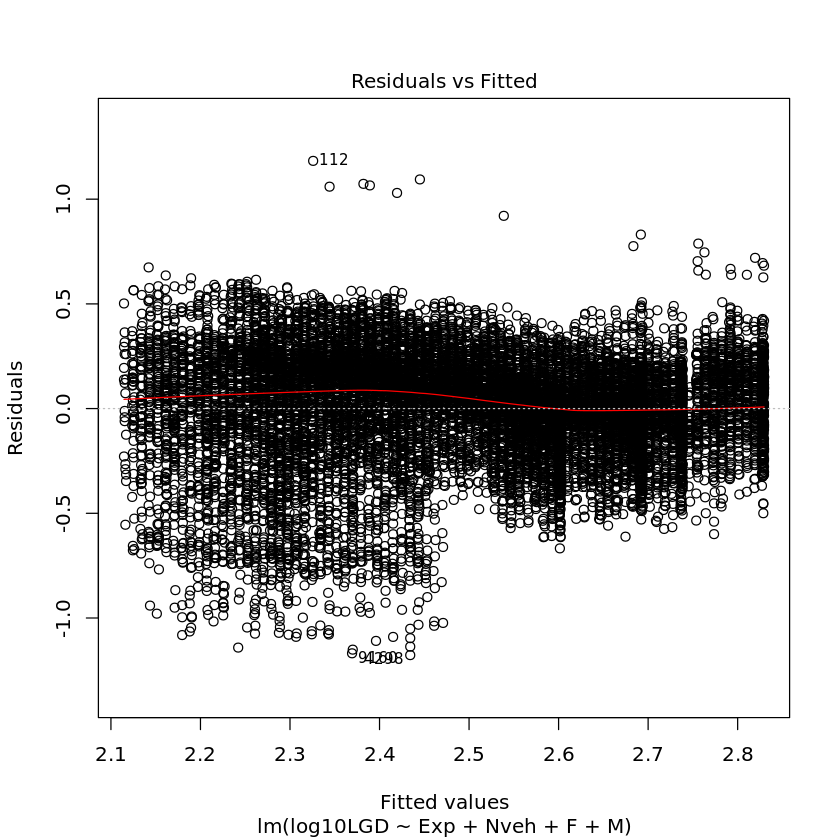

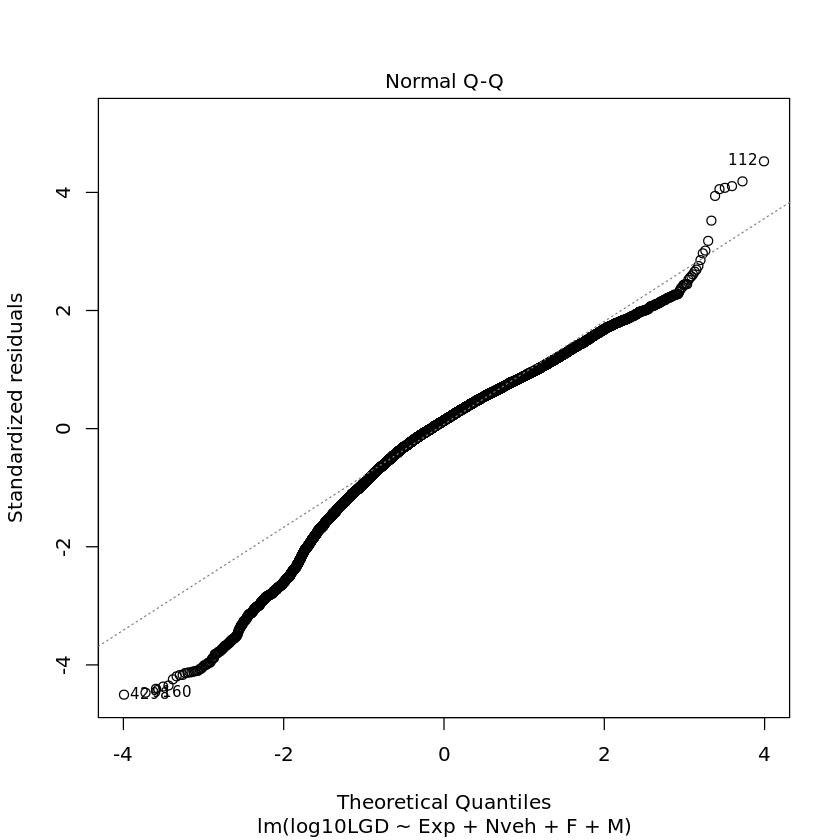

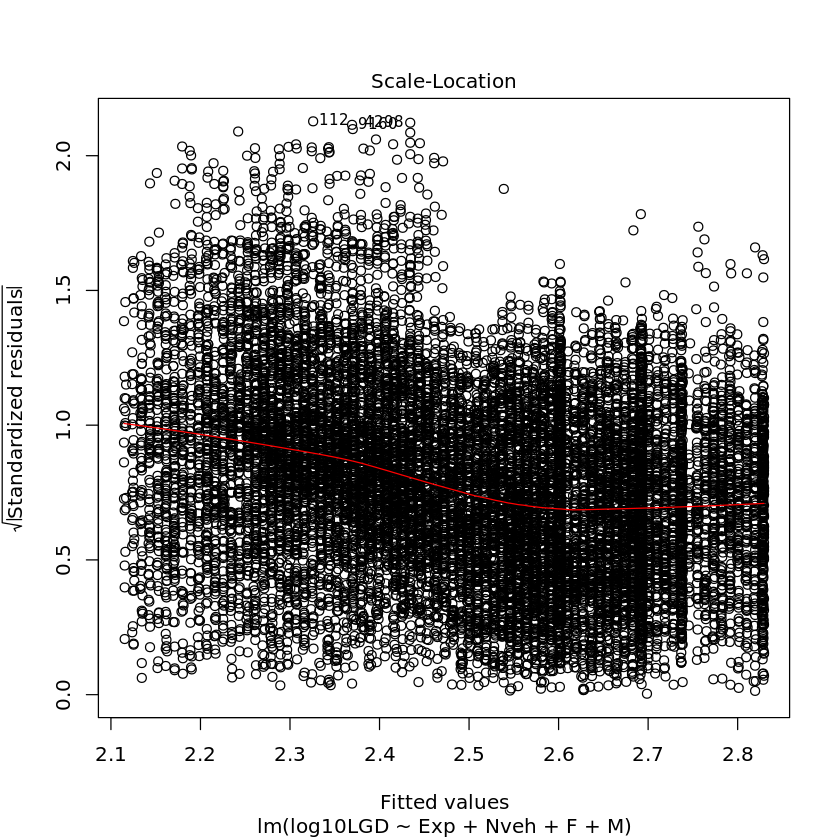

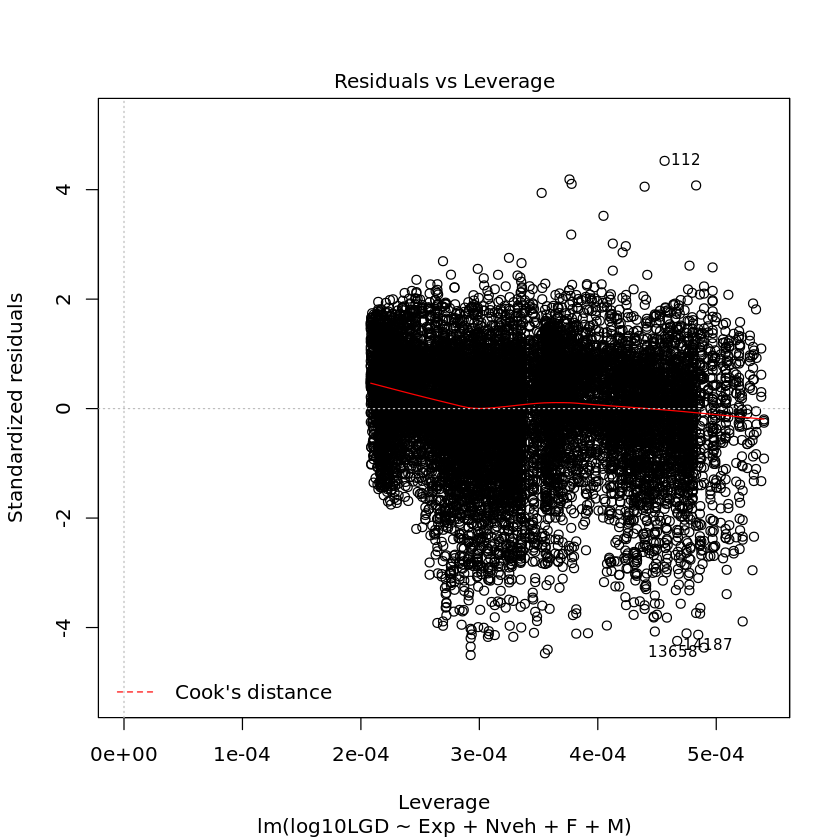

In [54]:
plot(linearModtr)